In [1]:
    import pandas as pd


In [4]:
df = pd.read_csv(r'C:\Users\GAURAVI\Documents\Retail-Sales-Analysis\data\raw\retail_sales_data.csv')

In [6]:
df.to_csv("C:/Users/GAURAVI/Documents/Retail-Sales-Analysis/data/raw/retail_sales_data.csv", index=False)

df_cleaned = df.drop_duplicates()

df_cleaned.to_csv("C:/Users/GAURAVI/Documents/Retail-Sales-Analysis/data/cleaned/retail_sales_data_cleaned.csv", index=False)


In [7]:
ls

 Volume in drive C is Main
 Volume Serial Number is 9A4C-5D58

 Directory of C:\Users\GAURAVI\Documents\Retail-Sales-Analysis\notebooks

27-07-2025  20:48    <DIR>          .
27-07-2025  18:04    <DIR>          ..
27-07-2025  20:30    <DIR>          .ipynb_checkpoints
27-07-2025  20:48             3,142 retail_sales_analysis.ipynb
               1 File(s)          3,142 bytes
               3 Dir(s)  32,045,244,416 bytes free


In [8]:
df.columns

Index(['Date', 'Store_ID', 'Product_ID', 'Category', 'Units_Sold',
       'Unit_Price', 'Revenue', 'Stock_On_Hand', 'Promotion_Flag'],
      dtype='object')

In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df.isnull().sum()  

Date              0
Store_ID          0
Product_ID        0
Category          0
Units_Sold        0
Unit_Price        0
Revenue           0
Stock_On_Hand     0
Promotion_Flag    0
dtype: int64

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
print(df.head())
print(df.info())

        Date Store_ID Product_ID   Category  Units_Sold  Unit_Price  Revenue  \
0 2023-01-01     S001       P001     Snacks           7       37.38   261.66   
1 2023-01-01     S001       P018  Beverages           8       22.55   180.40   
2 2023-01-01     S001       P016      Dairy          10       27.97   279.70   
3 2023-01-01     S001       P002  Beverages           6       95.40   572.40   
4 2023-01-01     S001       P009     Snacks           8       71.58   572.64   

   Stock_On_Hand  Promotion_Flag    Month  
0             71               0  2023-01  
1            269               1  2023-01  
2            104               1  2023-01  
3            109               0  2023-01  
4            160               0  2023-01  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8669 entries, 0 to 8668
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            8669 non-null   datetim

In [18]:
df['Date'] = pd.to_datetime(df['Date'])

df['Month'] = df['Date'].dt.to_period('M')
df['Day'] = df['Date'].dt.day_name()


In [ ]:
Total Sales by Month, Product, and Store

In [38]:
import pandas as pd

df['Date'] = pd.to_datetime(df['Date'])

df['Month'] = df['Date'].dt.to_period('M')

monthly_sales = df.groupby(['Month', 'Product_ID', 'Store_ID'])['Revenue'].sum().reset_index()

sales_pivot = monthly_sales.pivot_table(
    index=['Month'],
    columns=['Product_ID', 'Store_ID'],
    values='Revenue',
    fill_value=0,
    aggfunc='sum'
)

sales_pivot.head()


Product_ID      P001                                            P002  \
Store_ID        S001     S002      S003      S004      S005     S001   
Month                                                                  
2023-01      9143.71  6469.75   6073.68   9250.32   9659.22  9228.73   
2023-02      4100.10  5924.48   7835.77  12171.25   8514.41  6723.40   
2023-03      8198.11  7397.84  12050.32  10862.18   6615.74  9648.65   
2023-04      5956.59  8667.59   6872.02   6206.99   7144.25  4821.85   
2023-05     10663.53  9759.33  10747.55  10724.35  11393.49  8324.79   

Product_ID                                        ...      P019            \
Store_ID        S002      S003     S004     S005  ...      S001      S002   
Month                                             ...                       
2023-01     10085.55   7319.44  6926.07  8032.88  ...  11051.31   7586.68   
2023-02      8707.27  10074.28  6298.65  9281.26  ...   7919.99   8955.02   
2023-03      9007.04   5975.59  8794.49  6488.12  ...   5746.36   6643.65   
2023-04      6442.06   8112.00  8988.19  6788.67  ...   9479.07   8000.31   
2023-05      7524.67   8197.42  6130.37  9248.71  ...   8420.11  12383.34   

Product_ID                                  P020                               \
Store_ID        S003      S004     S005     S001      S002     S003      S004   
Month                                                                           
2023-01     11884.73  11380.51  7465.54  5424.14  11140.60  6284.33   5976.98   
2023-02      7956.21   7805.99  5953.96  4360.24   8218.10  7653.88   6803.53   
2023-03      9471.48   7454.11  6127.60  6667.87   7576.08  9674.95  11652.42   
2023-04      7854.14   7764.89  6774.32  9359.04   6090.46  7536.62   7432.18   
2023-05      8169.50  10479.48  8813.57  5174.12   9748.77  9040.44   6675.96   

Product_ID            
Store_ID        S005  
Month                 
2023-01     10809.40  
2023-02      5444.95  
2023-03      5229.86  
2023-04      7771.67  
2023-05     11772.30  

[5 rows x 100 columns]

In [ ]:
Top-Selling Products

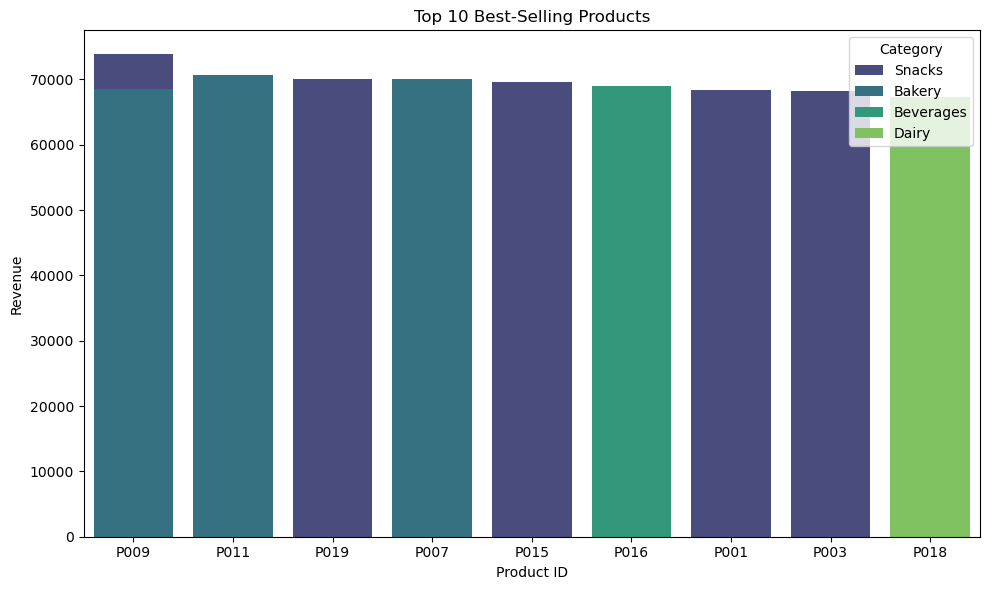

In [60]:
plt.figure(figsize=(10,6))
sns.barplot(data=top10, x='Product_ID', y='Revenue', hue='Category', dodge=False, palette='viridis')
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Product ID")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()


In [ ]:
Products with Frequent Stockouts

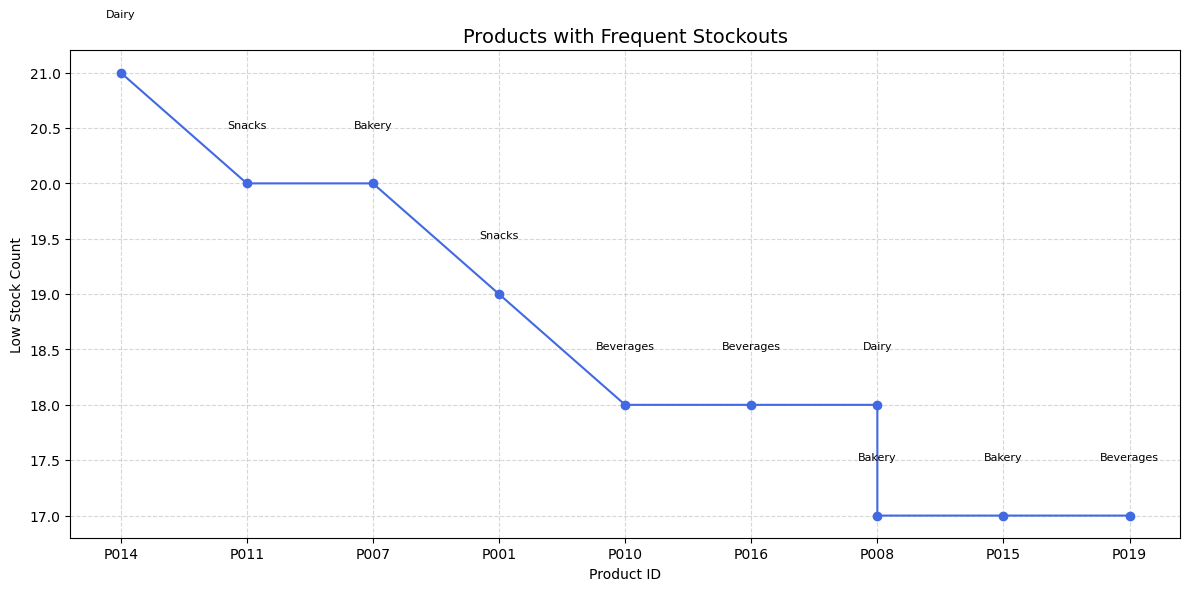

In [56]:
top_low_stock = top_low_stock.sort_values(by='Low_Stock_Count', ascending=False).reset_index(drop=True)

plt.figure(figsize=(12, 6))
plt.plot(top_low_stock['Product_ID'], top_low_stock['Low_Stock_Count'], marker='o', linestyle='-', color='royalblue')

for i, row in top_low_stock.iterrows():
    plt.text(row['Product_ID'], row['Low_Stock_Count'] + 0.5, row['Category'],
             ha='center', fontsize=8, color='black', rotation=0)

plt.title("Products with Frequent Stockouts", fontsize=14)
plt.xlabel("Product ID")
plt.ylabel("Low Stock Count")
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


In [ ]:
Impact of Promotions on Sales


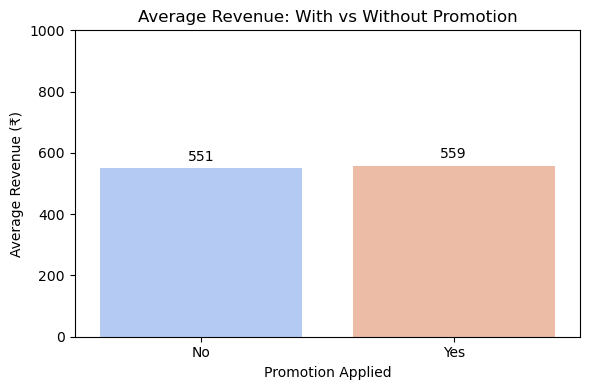

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

promotion_impact = df.groupby('Promotion_Flag')['Revenue'].mean().reset_index()

promotion_impact['Promotion'] = promotion_impact['Promotion_Flag'].map({0: 'No', 1: 'Yes'})

plt.figure(figsize=(6,4))
ax = sns.barplot(
    data=promotion_impact,
    x='Promotion',
    y='Revenue',
    hue='Promotion',  
    palette='coolwarm',
    legend=False
)

for i in ax.containers:
    ax.bar_label(i, fmt='%.0f', padding=3)

plt.ylim(0, 1000)

plt.title("Average Revenue: With vs Without Promotion")
plt.xlabel("Promotion Applied")
plt.ylabel("Average Revenue (₹)")
plt.tight_layout()
plt.show()


In [ ]:
Store-wise Performance

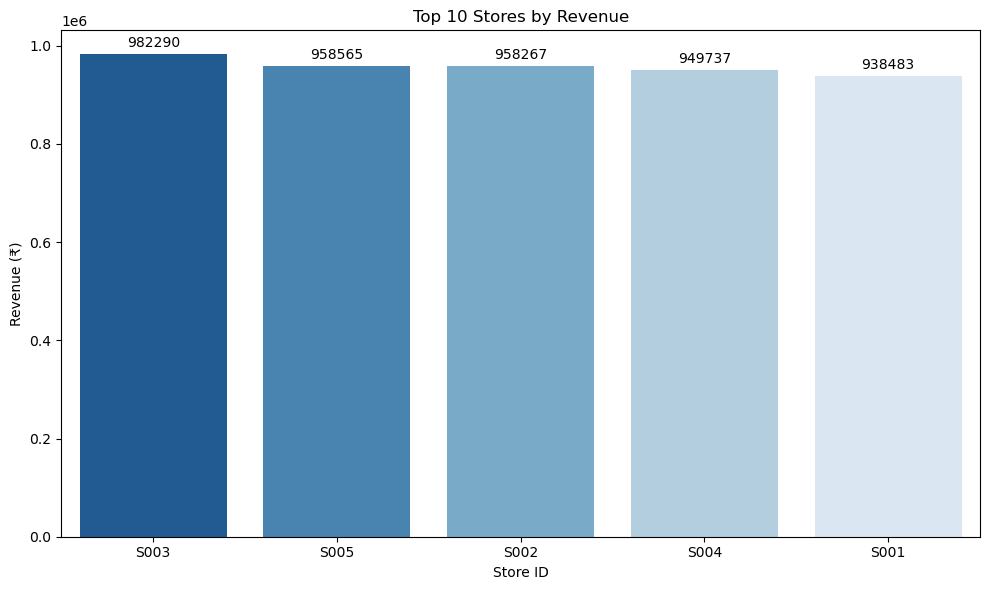

In [53]:

top_stores = sales_by_store.head(10)

plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=top_stores,
    x='Store_ID',
    y='Revenue',
    hue='Store_ID',          
    palette='Blues_r',
    dodge=False,
    legend=False              
)

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3)

plt.title("Top 10 Stores by Revenue")
plt.xlabel("Store ID")
plt.ylabel("Revenue (₹)")
plt.tight_layout()
plt.show()

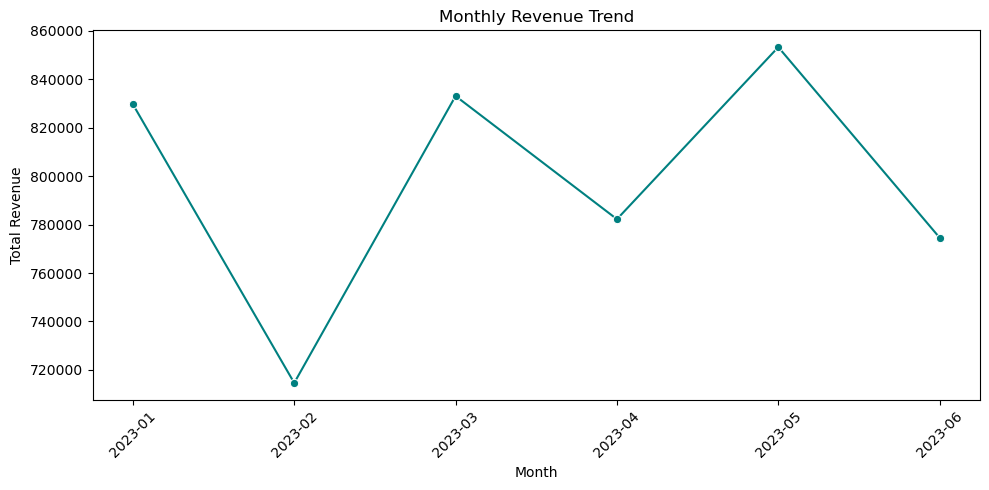

In [61]:
df['Date'] = pd.to_datetime(df['Date'])

df['Month'] = df['Date'].dt.to_period('M')

monthly_revenue = df.groupby('Month')['Revenue'].sum().reset_index()
monthly_revenue['Month'] = monthly_revenue['Month'].astype(str)

plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_revenue, x='Month', y='Revenue', marker='o', color='teal')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


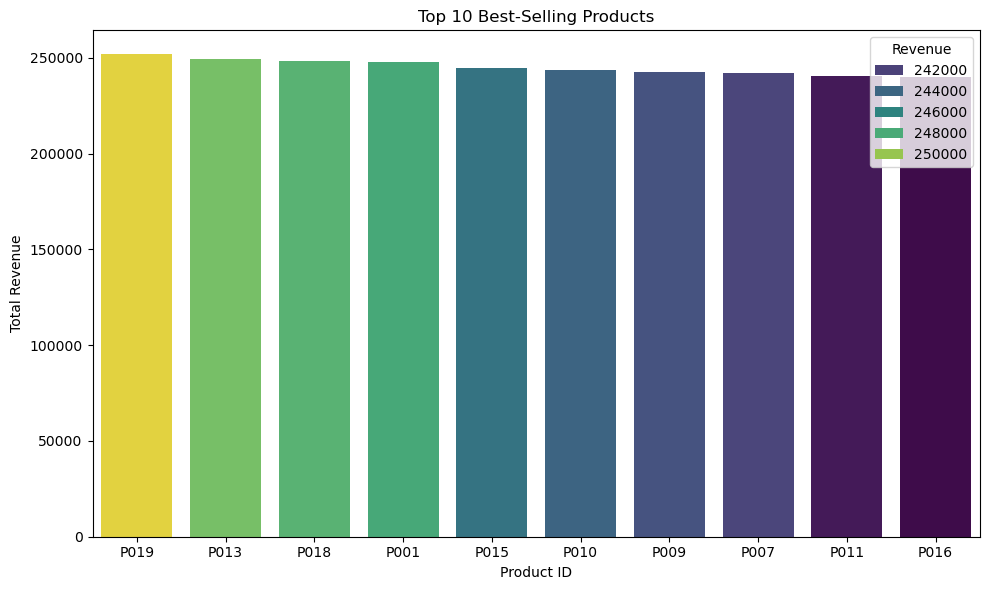

In [65]:
top10 = df.groupby('Product_ID')['Revenue'].sum().reset_index().sort_values(by='Revenue', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top10, x='Product_ID', y='Revenue', hue='Revenue', palette='viridis')
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Product ID")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()


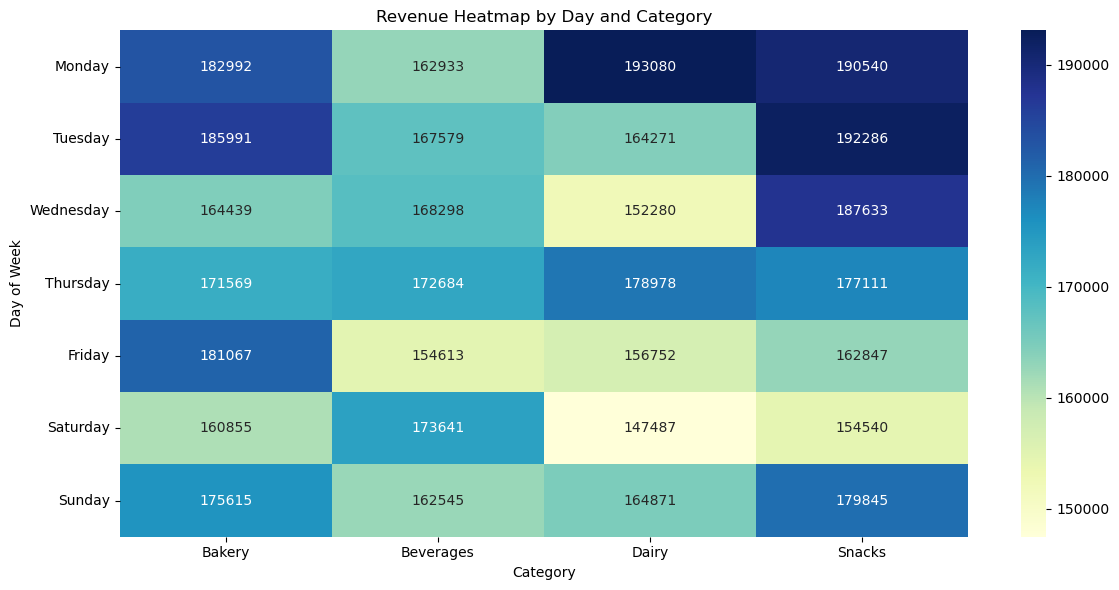

In [63]:
df['Day'] = df['Date'].dt.day_name()

heatmap_data = df.pivot_table(index='Day', columns='Category', values='Revenue', aggfunc='sum')

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(ordered_days)

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title("Revenue Heatmap by Day and Category")
plt.xlabel("Category")
plt.ylabel("Day of Week")
plt.tight_layout()
plt.show()


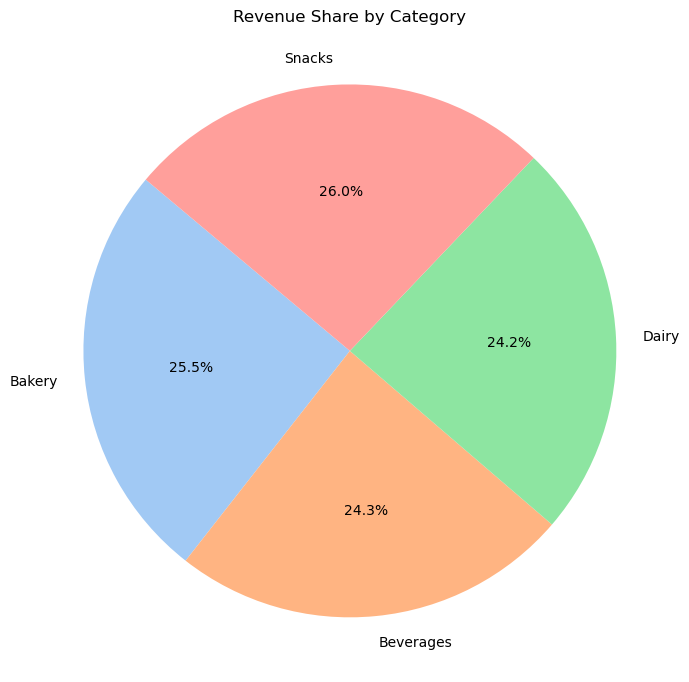

In [64]:
category_share = df.groupby('Category')['Revenue'].sum().reset_index()

plt.figure(figsize=(7,7))
plt.pie(category_share['Revenue'], labels=category_share['Category'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Revenue Share by Category")
plt.axis('equal')
plt.tight_layout()
plt.show()


In [66]:
df['Month'] = df['Date'].dt.month
df['Stock_Status'] = pd.cut(df['Stock_On_Hand'], bins=[0,100,200,500], labels=['Low','Normal','High'])


In [68]:
!pip install prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ----------- ---------------------------- 3.7/13.3 MB 18.1 MB/s eta 0:00:01
   ---------------------- ----------------- 7.6/13.3 MB 19.6 MB/s eta 0:00:01
   ---------------------------------- ----- 11.5/13.3 MB 19.0 MB/s eta 0:00:01
   ---------------------------------------- 13.3/13.3 MB 18.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 1.2/1.2 MB 19.7 MB/s eta 0:00:00


00:14:01 - cmdstanpy - INFO - Chain [1] start processing
00:14:01 - cmdstanpy - INFO - Chain [1] done processing
